In [1]:
from peak_warming_calculator  import *
import matplotlib.pyplot as plt

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt
import matplotlib.cm as cm

In [3]:
import time

# Sensitivity Analysis

In [4]:
r_minus_g = 0.015
consumption_growth = 0.02
consumption_discount = consumption_growth + r_minus_g

In [5]:
num_of_sample = 8
delta_T_sample = np.linspace(1.5, 3, num_of_sample)
alpha_sample = np.linspace(0.01, 0.1, num_of_sample)

In [6]:
P_100 = 300
P_50 = 0.4 * P_100
r = consumption_discount
s = 3 * r
T_TCRE_1 = 0.00045

In [7]:
peak_T_list = []

for i in range(num_of_sample):
    delta_T = delta_T_sample[i]
    
    peak_T_const_gamma = []
    for j in range(num_of_sample):
        alpha = alpha_sample[j]
        peak_T = peak_warming_calculator(P_50=P_50, P_100=P_100, delta_T=delta_T, alpha=alpha, consumption_growth=consumption_growth, consumption_discount=consumption_discount, s=s, r=r, T_TCRE_1=T_TCRE_1)
#         print(D0, gamma, peak_T)
#         print(peak_T)
        peak_T_const_gamma.append(peak_T)
#         peak_T_list.append(peak_T)
    
    peak_T_list.append(peak_T_const_gamma)



/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:126: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


In [8]:
peak_T_array = np.asarray(peak_T_list)

In [9]:
alpha_sample_i, delta_T_sample_i = np.meshgrid(alpha_sample, delta_T_sample)

In [10]:
alpha_sample_i

array([[0.01      , 0.02285714, 0.03571429, 0.04857143, 0.06142857,
        0.07428571, 0.08714286, 0.1       ],
       [0.01      , 0.02285714, 0.03571429, 0.04857143, 0.06142857,
        0.07428571, 0.08714286, 0.1       ],
       [0.01      , 0.02285714, 0.03571429, 0.04857143, 0.06142857,
        0.07428571, 0.08714286, 0.1       ],
       [0.01      , 0.02285714, 0.03571429, 0.04857143, 0.06142857,
        0.07428571, 0.08714286, 0.1       ],
       [0.01      , 0.02285714, 0.03571429, 0.04857143, 0.06142857,
        0.07428571, 0.08714286, 0.1       ],
       [0.01      , 0.02285714, 0.03571429, 0.04857143, 0.06142857,
        0.07428571, 0.08714286, 0.1       ],
       [0.01      , 0.02285714, 0.03571429, 0.04857143, 0.06142857,
        0.07428571, 0.08714286, 0.1       ],
       [0.01      , 0.02285714, 0.03571429, 0.04857143, 0.06142857,
        0.07428571, 0.08714286, 0.1       ]])

In [11]:
delta_T_sample_i

array([[1.5       , 1.5       , 1.5       , 1.5       , 1.5       ,
        1.5       , 1.5       , 1.5       ],
       [1.71428571, 1.71428571, 1.71428571, 1.71428571, 1.71428571,
        1.71428571, 1.71428571, 1.71428571],
       [1.92857143, 1.92857143, 1.92857143, 1.92857143, 1.92857143,
        1.92857143, 1.92857143, 1.92857143],
       [2.14285714, 2.14285714, 2.14285714, 2.14285714, 2.14285714,
        2.14285714, 2.14285714, 2.14285714],
       [2.35714286, 2.35714286, 2.35714286, 2.35714286, 2.35714286,
        2.35714286, 2.35714286, 2.35714286],
       [2.57142857, 2.57142857, 2.57142857, 2.57142857, 2.57142857,
        2.57142857, 2.57142857, 2.57142857],
       [2.78571429, 2.78571429, 2.78571429, 2.78571429, 2.78571429,
        2.78571429, 2.78571429, 2.78571429],
       [3.        , 3.        , 3.        , 3.        , 3.        ,
        3.        , 3.        , 3.        ]])

In [12]:
peak_T_array

array([[2.58791233, 2.58795919, 2.58796703, 2.5879684 , 2.58796851,
        2.58796838, 2.58796822, 2.58796808],
       [2.58806537, 2.58814634, 2.58816091, 2.58816375, 2.58816413,
        2.58816397, 2.58816372, 2.5881635 ],
       [2.58821205, 2.58832659, 2.58834865, 2.58835335, 2.58835416,
        2.58835405, 2.58835376, 2.58835346],
       [2.58835265, 2.58850014, 2.58853015, 2.58853706, 2.58853849,
        2.58853852, 2.58853821, 2.58853786],
       [2.58848757, 2.58963247, 2.58950353, 2.58947185, 2.58946442,
        2.58946356, 2.58946445, 2.5894657 ],
       [2.58979998, 2.58819316, 2.58944524, 2.58898059, 2.58886026,
        2.58883833, 2.5888449 , 2.58885865],
       [2.58938212, 2.58992595, 2.588394  , 2.58834316, 2.58832889,
        2.58832558, 2.58832567, 2.58832675],
       [2.58994075, 2.58808822, 2.58787451, 2.5878132 , 2.58779479,
        2.58778981, 2.58778923, 2.58779005]])

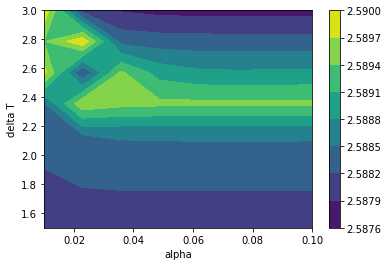

In [13]:
fig, axs = plt.subplots(1,1)

cs = axs.contourf(alpha_sample_i, delta_T_sample_i, peak_T_array)
plt.xlabel("alpha")
plt.ylabel("delta T")
fig.colorbar(cs, ax=axs)